   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


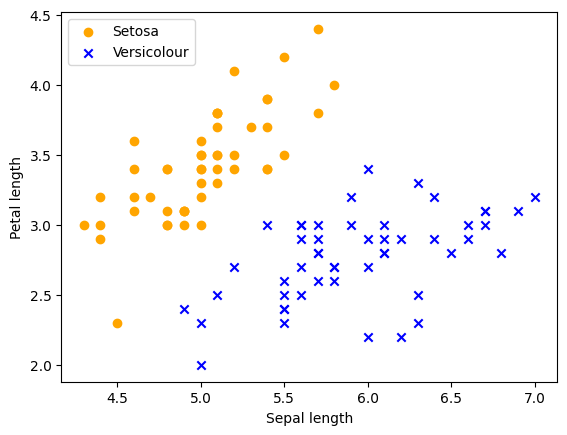

accuracy 100.0


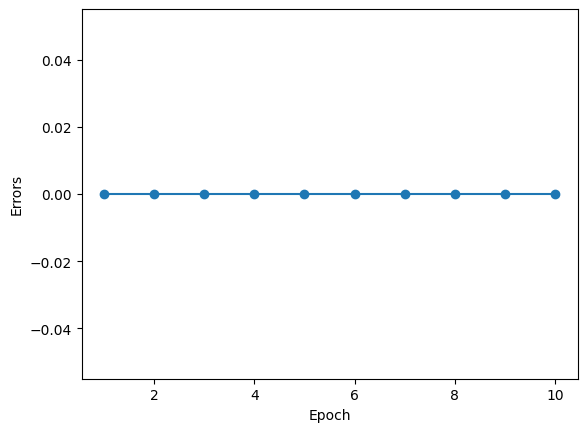

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class Perceptron:
 def __init__(self,learning_rate=0.1):
     self.learning_rate = learning_rate
     self._b = 0.0  #y-intercept
     self._w = None # weights assigned to input features
     self.misclassified_samples = []
 def fit(self, x: np.array, y: np.array, n_iter=10):
     self._b = 0.0
     self._w = np.zeros(x.shape[1])
     self.misclassified_samples = []
     for _ in range(n_iter):
         # counter of the errors during this training interaction
         errors = 0
         for xi, yi in zip(x,y):
             update = self.learning_rate * (yi - self.predict(xi))
             self._b += update
             self._w += update * xi
             errors += int(update != 0.0)
         self.misclassified_samples.append(errors)
 def f(self, x: np.array) -> float:
     return np.dot(x, self._w) + self._b
 def predict(self, x: np.array):
     return np.where(self.f(x) >= 0,1,-1)

df = pd.read_csv("Iris (1).csv")
print(df.head())
# extract the label column
y = df.iloc[:,4].values
# extract features
x = df.iloc[:,0:3].values
#reduce dimensionality of the data
x = x[0:100, 0:2]
y = y[0:100]
#plot Iris Setosa samples
plt.scatter(x[:50,0], x[:50,1], color='orange', marker='o', label='Setosa')
#plot Iris Versicolour samples
plt.scatter(x[50:100,0], x[50:100,1], color='blue', marker='x', label='Versicolour')
#show the legend
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')
#show the plot
plt.show()

y = np.where(y == 'Iris-Setosa',1,-1)
x[:,0] = (x[:,0] - x[:,0].mean()) / x[:,0].std()
x[:,1] = (x[:,1] - x[:,1].mean()) / x[:,1].std()
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)
# train the model
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)
print("accuracy",accuracy_score(classifier.predict(x_test),y_test)*100)
# plot the number of errors during each iteration
plt.plot(range(1,len(classifier.misclassified_samples)+1),classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()